In [475]:
import spotipy
import json
import requests
import time
import urllib
from urllib.parse import urlunparse, urlencode
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
#from spotipy.oauth2 import SpotifyClientCredentials
import Spotifyauth
from Spotifyauth import Clientid, Clientsecret
#auth_manager = SpotifyClientCredentials(client_id='df3c609a482a4923a2dd14a216a8c067', client_secret='e323f89a324c4419ae898f87ec1b00bb')
#sp = spotipy.Spotify(auth_manager=auth_manager)

In [49]:
userfiles = ["StreamingHistoryJosh.json", "StreamingHistoryMako.json", "StreamingHistorySam.json", "StreamingHistoryGabriela.json"]
usernames = ["Josh", "Mako", "Sam", "Gabriela"]

In [51]:
userSongDict = {}
for i in range(0, len(userfiles)):
    with open(userfiles[i], 'r') as input_file:
        input_data = input_file.read()
        consolidatedstreamingdata = json.loads(input_data)
        userSongDict[usernames[i]] = consolidatedstreamingdata

In [52]:
def get_track_id(trackName, artistName):
    q = {}
    q['track'] = trackName
    q['artist'] = artistName
    try:
        result = sp.search(urlencode(q), type='track')
    except Exception as e:
        print("Exception encountered while searching song!!!: " + str(e))
        raise e
    return result

In [ ]:
songFeatureDict = {}
i = 0
for user in usernames:
    print("Working on listener: " + user)
    for song in userSongDict[user]:
        try:
            try:
                id = get_track_id(song['trackName'], song['artistName'])['tracks']['items'][0]['id']
            except Exception as ex:
                print("WARNING! Some exception occurred when trying to search song: " + str(song))
                print(str(ex))
                continue
            time.sleep(0.1)
            features = sp.audio_features([id])
            songFeatureDict[song['trackName']] = features
            i = i + 1
            if i%500 == 0:
                print("Processing: " + song['trackName'])
                print("processed " + str(i) + " records")
        except Exception as e:
            print("WARNING! Some exception occurred when trying to fetch features for song: " + str(song))
            print(str(e))
            pass

Working on listener: Josh
WARNING! Some exception occurred when trying to fetch features for song: {'endTime': '2022-05-09 01:53', 'artistName': 'Man Man', 'trackName': 'Gold Teeth', 'msPlayed': 7697}
HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%CA%85%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%28%C6%9F%D3%A8%29%CA%83%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1+%EA%90%91%28%E0%BD%80+%E0%B6%8A%E0%BA%B9+%E0%B0%A0%E0%B1%80%E0%A9%82%E0%B3%A7%E0%BA%B9%E0%BF%83%E0%A5%82%E0%A9%82%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E0%B7%85%E0%B6%95%E0%B8%B1%E0%BF%83%E0%A5%82%E0%A9%82%E0%BF%83%E0%A5%82%E0%A9%82&artist=%E2%A3%8E%E2%A1%87%EA%89%BA%E1%83%9A%E0%BC%BD%E0%AE%87%E2%80%A2%CC%9B%29%E0%BE%80%E2%97%9E+%E0%BC%8E%E0%BA%B6+%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%EA%89%BA%E1%83%9A', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Bad request.
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%E0%A9%82%E0%BF%83%E0%A5%82%E0%A9%82%E0%B7%85%E0%B6%95%E0%B8%B1%E2%9C%A7%E2%9C%A7%C4%B1%CC%B4%CC%B4%CC%A1+%CC%A1%CC%A1%CD%A1%7C%CC%B2%CC%B2%CC%B2

Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%25CA%2585%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%2528%25C6%259F%25D3%25A8%2529%25CA%2583%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%2B%25EA%2590%2591%2528%25E0%25BD%2580%2B%25E0%25B6%258A%25E0%25BA%25B9%2B%25E0%25B0%25A0%25E0%25B1%2580%25E0%25A9%2582%25E0%25B3%25A7%25E0%25BA%25B9%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E0%25B7%2585%25E0%25B6%2595%25E0%25B8%25B1%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%26artist%3D%25E2%25A3%258E%25E2%25A1%2587%25EA%2589%25BA%25E1%2583%259A%25E0%25BC%25BD%25E0%25AE%2587%25E2%2580%25A2%25CC%259B%2529%25E0%25BE%2580%25E2%2597%259E%2B%25E0%25BC%258E%25E0%25BA%25B6%2B%25E

WARNING! Some exception occurred when trying to search song: {'endTime': '2022-07-16 05:53', 'artistName': 'Jlin', 'trackName': 'Expand', 'msPlayed': 223973}
list index out of range
Processing: The Beat - 2021 Remaster
processed 1500 records
WARNING! Some exception occurred when trying to search song: {'endTime': '2022-08-05 20:54', 'artistName': 'Bumblebeez', 'trackName': 'Dr Love - Interlude Version', 'msPlayed': 4840}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2022-08-19 05:14', 'artistName': 'Jlin', 'trackName': '1%', 'msPlayed': 12342}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2022-08-23 03:49', 'artistName': 'Akiko Wada', 'trackName': 'どしゃぶりの雨の中で', 'msPlayed': 255776}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2022-08-23 04:10', 'artistName': 'NEU!', 'trackName': 'Sonderangebot', 'msPlayed': 37902}
list index out of 

Processing: 2/1 - Remastered 2004
processed 5000 records
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-01-14 04:15', 'artistName': 'Alex G', 'trackName': 'TV', 'msPlayed': 3096}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-01-14 05:24', 'artistName': 'Alex G', 'trackName': 'TV', 'msPlayed': 75524}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-01-16 23:03', 'artistName': 'Danger', 'trackName': '3:16', 'msPlayed': 18155}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-01-16 23:04', 'artistName': 'Danger', 'trackName': '3:16', 'msPlayed': 0}
list index out of range
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-01-16 23:04', 'artistName': 'Danger', 'trackName': '3:16', 'msPlayed': 34837}
list index out of range
WARNING! Some exception occurred when trying to

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%CA%85%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%28%C6%9F%D3%A8%29%CA%83%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1+%EA%90%91%28%E0%BD%80+%E0%B6%8A%E0%BA%B9+%E0%B0%A0%E0%B1%80%E0%A9%82%E0%B3%A7%E0%BA%B9%E0%BF%83%E0%A5%82%E0%A9%82%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E0%B7%85%E0%B6%95%E0%B8%B1%E0%BF%83%E0%A5%82%E0%A9%82%E0%BF%83%E0%A5%82%E0%A9%82&artist=%E2%A3%8E%E2%A1%87%EA%89%BA%E1%83%9A%E0%BC%BD%E0%AE%87%E2%80%A2%CC%9B%29%E0%BE%80%E2%97%9E+%E0%BC%8E%E0%BA%B6+%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%EA%89%BA%E1%83%9A', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Bad request.


Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%25CA%2585%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%2528%25C6%259F%25D3%25A8%2529%25CA%2583%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%2B%25EA%2590%2591%2528%25E0%25BD%2580%2B%25E0%25B6%258A%25E0%25BA%25B9%2B%25E0%25B0%25A0%25E0%25B1%2580%25E0%25A9%2582%25E0%25B3%25A7%25E0%25BA%25B9%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E2%259C%25A7%25E0%25B7%2585%25E0%25B6%2595%25E0%25B8%25B1%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%26artist%3D%25E2%25A3%258E%25E2%25A1%2587%25EA%2589%25BA%25E1%2583%259A%25E0%25BC%25BD%25E0%25AE%2587%25E2%2580%25A2%25CC%259B%2529%25E0%25BE%2580%25E2%2597%259E%2B%25E0%25BC%258E%25E0%25BA%25B6%2B%25E

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%28%29v%C8%AF%29%29+%CC%B7%CC%A8%CA%85%28%DB%9D%CA%85%28%C6%9F%CA%85%28%29%3A%3A%3A%28%29%CC%B5%CC%B3%CC%97%CC%8A%28%C6%9F%CA%85%28%29v%C8%AF%29%29+%CC%B7%CC%A8%CA%85&artist=%E2%A3%8E%E2%A1%87%EA%89%BA%E1%83%9A%E0%BC%BD%E0%AE%87%E2%80%A2%CC%9B%29%E0%BE%80%E2%97%9E+%E0%BC%8E%E0%BA%B6+%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%EA%89%BA%E1%83%9A', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Bad request.
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%CA%85%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%28%C6%9F%D3%A8%29%CA%83%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1+%EA%90%91%28%E0%BD%80+%E0%B6%8A%E0%BA%B9+%E0%B0%A0%E0%B1%80%E0%A9%82%E0%B3%A7%E0%BA%B9%E0%BF%83%E0%A5%82%E0%A9%82%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E2%9C%A7%E0%B7%85%E0%B6%95%E0%B8%B1%E0%BF%83%E0%A5%82%E0%A9%82%E0%BF

Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%2528%2529v%25C8%25AF%2529%2529%2B%25CC%25B7%25CC%25A8%25CA%2585%2528%25DB%259D%25CA%2585%2528%25C6%259F%25CA%2585%2528%2529%253A%253A%253A%2528%2529%25CC%25B5%25CC%25B3%25CC%2597%25CC%258A%2528%25C6%259F%25CA%2585%2528%2529v%25C8%25AF%2529%2529%2B%25CC%25B7%25CC%25A8%25CA%2585%26artist%3D%25E2%25A3%258E%25E2%25A1%2587%25EA%2589%25BA%25E1%2583%259A%25E0%25BC%25BD%25E0%25AE%2587%25E2%2580%25A2%25CC%259B%2529%25E0%25BE%2580%25E2%2597%259E%2B%25E0%25BC%258E%25E0%25BA%25B6%2B%25E0%25BC%25BD%25E0%25A7%25A3%25E0%25A7%25A2%25D8%259E%25E0%25A7%25A2%25D8%259E%25D8%2596%2B%25EA%2589%25BA%25E1%2583%259A&limit=10&offset=0&type=track:
 Bad request., reason: None
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-03-24 23:35', 'artistName': '⣎⡇ꉺლ༽இ•̛)ྀ◞ ༎ຶ ༽ৣৢ؞ৢ؞ؖ ꉺლ', 'trackName': '()vȯ)) ̷̨ʅ(\u06ddʅ(Ɵʅ():::()̵̳̗̊(Ɵʅ()vȯ)) ̷̨ʅ', 'msPlayed': 271642}
http 

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89+%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89+%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89+%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89+%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89+%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89+%CC%B8+%CC%A1+%D2%89+%D2%89.%C2%B7%E0%B9%91%E0%B6%95%E0%B8%B1+%D2%89&artist=%E2%A3%8E%E2%A1%87%EA%89%BA%E1%83%9A%E0%BC%BD%E0%AE%87%E2%80%A2%CC%9B%29%E0%BE%80%E2%97%9E+%E0%BC%8E%E0%BA%B6+%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%EA%89%BA%E1%83%9A', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Bad request.
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%E0%BF%83%E0%A5%82%E0%A9%82%E0%BF%83%E0%A5%82%E0%A9%82%E0%A9%82%E0%B

Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%2B%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%2B%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%2B%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%2B%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%2B%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%2B%25CC%25B8%2B%25CC%25A1%2B%25D2%2589%2B%25D2%2589.%25C2%25B7%25E0%25B9%2591%25E0%25B6%2595%25E0%25B8%25B1%2B%25D2%2589%26artist%3D%25E2%25A3%258E%25E2%25A1

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%E2%9C%A7%E2%82%8A%E2%81%8E%E2%9D%9D%E1%B7%80%E0%BA%BB%E0%BD%BD%2A%E0%B3%83%C6%AA%E2%9D%8D%E2%8A%81%C6%AA%E2%9D%8D%E2%8A%81%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%E0%BD%A5&artist=%E2%A3%8E%E2%A1%87%EA%89%BA%E1%83%9A%E0%BC%BD%E0%AE%87%E2%80%A2%CC%9B%29%E0%BE%80%E2%97%9E+%E0%BC%8E%E0%BA%B6+%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%EA%89%BA%E1%83%9A', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Bad request.


Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%25E2%259C%25A7%25E2%2582%258A%25E2%2581%258E%25E2%259D%259D%25E1%25B7%2580%25E0%25BA%25BB%25E0%25BD%25BD%252A%25E0%25B3%2583%25C6%25AA%25E2%259D%258D%25E2%258A%2581%25C6%25AA%25E2%259D%258D%25E2%258A%2581%25E0%25BC%25BD%25E0%25A7%25A3%25E0%25A7%25A2%25D8%259E%25E0%25A7%25A2%25D8%259E%25D8%2596%2B%25E0%25BD%25A5%26artist%3D%25E2%25A3%258E%25E2%25A1%2587%25EA%2589%25BA%25E1%2583%259A%25E0%25BC%25BD%25E0%25AE%2587%25E2%2580%25A2%25CC%259B%2529%25E0%25BE%2580%25E2%2597%259E%2B%25E0%25BC%258E%25E0%25BA%25B6%2B%25E0%25BC%25BD%25E0%25A7%25A3%25E0%25A7%25A2%25D8%259E%25E0%25A7%25A2%25D8%259E%25D8%2596%2B%25EA%2589%25BA%25E1%2583%259A&limit=10&offset=0&type=track:
 Bad request., reason: None
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-03-25 00:01', 'artistName': '⣎⡇ꉺლ༽இ•̛)ྀ◞ ༎ຶ ༽ৣৢ؞ৢ؞ؖ ꉺლ', 'trackName': '✧₊⁎❝᷀ົཽ*ೃƪ❍⊁ƪ❍⊁༽ৣৢ؞ৢ؞ؖ ཥ', 'msPlayed':

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%CC%9F%CC%9E%CC%9D%CC%9C%CC%99%CC%98%CC%97%CC%96%D2%89%CC%B5%CC%B4%CC%A8%CC%A7%CC%A2%CC%A1%CC%BC%CC%BB%CC%BA%CC%B9%CC%B3%CC%B2%CC%B1%CC%B0%CC%AF%CC%AE%CC%AD%CC%AC%CC%AB%CC%AA%CC%A9%CC%A6%CC%A5%CC%A4%CC%A3%CC%A0%D2%88%CD%88%CD%87%CD%89%CD%8D%CD%8E%CD%93%CD%94%CD%95%CD%96%CD%99%CD%9A%CD%9C%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%CD%85+%E0%B0%A0%E0%B1%80%E0%A9%82%E0%B3%A7%E0%BA%B9%E0%BF%83%E0%A5%82%E0%A9%82%E2%9C%A7%E0%B7%85%CA%85%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%CD%A1%28%C6%AA%E2%9D%8D%E2%8A%81%E2%97%9E..%E2%97%9F%E2%8A%80+%CC%9F%CC%9E%CC%9D%CC%9C%CC%99%CC%98%CC%97%CC%96%D2%89%CC%B5%CC%B4%CC%A8%CC%A7%CC%A2%CC%A1%CC%BC%CC%BB%CC%BA%CC%B9%CC%B3%CC%B2%CC%B1%CC%B0%CC%AF%CC%AE%CC%AD%CC%AC%CC%AB%CC%AA%CC%A9%CC%A6%CC%A5%CC%A4%CC%A3%CC%A0%D2%88%CD%88%CD%87%CD%89%CD%8D%CD%8E%CD%93%CD%94%CD%95%CD%96%CD%99%CD%9A%CD%9C%CD%A2%CD%A2%CD%A2%CD%A2%CD%A2%C

Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%25CC%259F%25CC%259E%25CC%259D%25CC%259C%25CC%2599%25CC%2598%25CC%2597%25CC%2596%25D2%2589%25CC%25B5%25CC%25B4%25CC%25A8%25CC%25A7%25CC%25A2%25CC%25A1%25CC%25BC%25CC%25BB%25CC%25BA%25CC%25B9%25CC%25B3%25CC%25B2%25CC%25B1%25CC%25B0%25CC%25AF%25CC%25AE%25CC%25AD%25CC%25AC%25CC%25AB%25CC%25AA%25CC%25A9%25CC%25A6%25CC%25A5%25CC%25A4%25CC%25A3%25CC%25A0%25D2%2588%25CD%2588%25CD%2587%25CD%2589%25CD%258D%25CD%258E%25CD%2593%25CD%2594%25CD%2595%25CD%2596%25CD%2599%25CD%259A%25CD%259C%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%25A2%25CD%2585%2B%25E0%25B0%25A0%25E0%25B1%2580%25E0%25A9%2582%25E0%25B3%25A7%25E0%25BA%25B9%25E0%25BF%2583%25E0%25A5%2582%25E0%25A9%2582%25E2%259C%25A7%25E0%25B7%2585%25CA%2585%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25A1%25CD%25

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track=%28%29v%C8%AF%29%29+%CC%B7%CC%A8%CA%85%28%DB%9D%CA%85%28%C6%9F%CA%85%28%29%3A%3A%3A%28%29%CC%B5%CC%B3%CC%97%CC%8A%28%C6%9F%CA%85%28%29v%C8%AF%29%29+%CC%B7%CC%A8%CA%85&artist=%E2%A3%8E%E2%A1%87%EA%89%BA%E1%83%9A%E0%BC%BD%E0%AE%87%E2%80%A2%CC%9B%29%E0%BE%80%E2%97%9E+%E0%BC%8E%E0%BA%B6+%E0%BC%BD%E0%A7%A3%E0%A7%A2%D8%9E%E0%A7%A2%D8%9E%D8%96+%EA%89%BA%E1%83%9A', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Bad request.


Exception encountered while searching song!!!: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3D%2528%2529v%25C8%25AF%2529%2529%2B%25CC%25B7%25CC%25A8%25CA%2585%2528%25DB%259D%25CA%2585%2528%25C6%259F%25CA%2585%2528%2529%253A%253A%253A%2528%2529%25CC%25B5%25CC%25B3%25CC%2597%25CC%258A%2528%25C6%259F%25CA%2585%2528%2529v%25C8%25AF%2529%2529%2B%25CC%25B7%25CC%25A8%25CA%2585%26artist%3D%25E2%25A3%258E%25E2%25A1%2587%25EA%2589%25BA%25E1%2583%259A%25E0%25BC%25BD%25E0%25AE%2587%25E2%2580%25A2%25CC%259B%2529%25E0%25BE%2580%25E2%2597%259E%2B%25E0%25BC%258E%25E0%25BA%25B6%2B%25E0%25BC%25BD%25E0%25A7%25A3%25E0%25A7%25A2%25D8%259E%25E0%25A7%25A2%25D8%259E%25D8%2596%2B%25EA%2589%25BA%25E1%2583%259A&limit=10&offset=0&type=track:
 Bad request., reason: None
WARNING! Some exception occurred when trying to search song: {'endTime': '2023-03-25 00:19', 'artistName': '⣎⡇ꉺლ༽இ•̛)ྀ◞ ༎ຶ ༽ৣৢ؞ৢ؞ؖ ꉺლ', 'trackName': '()vȯ)) ̷̨ʅ(\u06ddʅ(Ɵʅ():::()̵̳̗̊(Ɵʅ()vȯ)) ̷̨ʅ', 'msPlayed': 39727}
http s

In [37]:
get_track_id("Melody120", "Luke Abbott")

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3DMelody120%26artist%3DLuke%2BAbbott&type=track&offset=0&limit=10',
  'items': [],
  'limit': 10,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [24]:
i = 0
for key, value in songFeatureDict.items() :
    print (key, value)
    i += 1
    if (i == 100):
        break

Time of the Season - Mono Version [{'danceability': 0.536, 'energy': 0.696, 'key': 4, 'loudness': -6.818, 'mode': 0, 'speechiness': 0.0365, 'acousticness': 0.134, 'instrumentalness': 3.19e-06, 'liveness': 0.287, 'valence': 0.683, 'tempo': 117.179, 'type': 'audio_features', 'id': '6hleUCx3E4gB2urwRvx1QT', 'uri': 'spotify:track:6hleUCx3E4gB2urwRvx1QT', 'track_href': 'https://api.spotify.com/v1/tracks/6hleUCx3E4gB2urwRvx1QT', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6hleUCx3E4gB2urwRvx1QT', 'duration_ms': 214027, 'time_signature': 4}]
Everybody’s Gotta Live [{'danceability': 0.605, 'energy': 0.281, 'key': 9, 'loudness': -11.877, 'mode': 0, 'speechiness': 0.129, 'acousticness': 0.607, 'instrumentalness': 0, 'liveness': 0.116, 'valence': 0.28, 'tempo': 103.877, 'type': 'audio_features', 'id': '6fBPZBMT8pokhb7dH7Wizn', 'uri': 'spotify:track:6fBPZBMT8pokhb7dH7Wizn', 'track_href': 'https://api.spotify.com/v1/tracks/6fBPZBMT8pokhb7dH7Wizn', 'analysis_url': 'https://api.spotify

In [30]:
with open('spotify_audio_features.tsv', 'w') as output_file:
    print("SongName\tDanceability\tEnergy\tKey\tLoudness\tMode\tSpeechiness\tAcousticness\tInstrumentalness\tLiveness\tValence\tTempo", file=output_file)
    for song, features in songFeatureDict.items():

        if (features != None and features != [None]):
            print(f"{song}\t{features[0]['danceability']}\t{features[0]['energy']}\t{features[0]['key']}\t{features[0]['loudness']}\t{features[0]['mode']}\t{features[0]['speechiness']}\t{features[0]['acousticness']}\t{features[0]['instrumentalness']}\t{features[0]['liveness']}\t{features[0]['valence']}\t{features[0]['tempo']}", file=output_file)

In [32]:
userSongDict

{'Josh': [{'endTime': '2022-05-05 18:42',
   'artistName': 'The Zombies',
   'trackName': 'Time of the Season - Mono Version',
   'msPlayed': 40740},
  {'endTime': '2022-05-06 19:12',
   'artistName': 'Love',
   'trackName': 'Everybody’s Gotta Live',
   'msPlayed': 204521},
  {'endTime': '2022-05-06 19:14',
   'artistName': 'Connie Converse',
   'trackName': 'The Clover Saloon',
   'msPlayed': 134005},
  {'endTime': '2022-05-06 19:26',
   'artistName': 'Flume',
   'trackName': 'How To Build A Relationship',
   'msPlayed': 184816},
  {'endTime': '2022-05-06 19:29',
   'artistName': 'David Kanaga',
   'trackName': 'Space OX',
   'msPlayed': 146817},
  {'endTime': '2022-05-06 19:40',
   'artistName': 'Rihanna',
   'trackName': 'Stay',
   'msPlayed': 27460},
  {'endTime': '2022-05-07 00:07',
   'artistName': 'Charlotte Hatherley',
   'trackName': 'White',
   'msPlayed': 243186},
  {'endTime': '2022-05-07 00:11',
   'artistName': 'Charlotte Hatherley',
   'trackName': 'Alexander',
   'msPla

In [42]:
for user in usernames:
    print("Working on listener: " + user)
    for song in userSongDict[user]:
        song['endTime'] = song["endTime"][0:10]

Working on listener: Josh
Working on listener: Mako
Working on listener: Sam
Working on listener: Gabriela


In [43]:
userSongDict

{'Josh': [{'endTime': '2022-05-05',
   'artistName': 'The Zombies',
   'trackName': 'Time of the Season - Mono Version',
   'msPlayed': 40740},
  {'endTime': '2022-05-06',
   'artistName': 'Love',
   'trackName': 'Everybody’s Gotta Live',
   'msPlayed': 204521},
  {'endTime': '2022-05-06',
   'artistName': 'Connie Converse',
   'trackName': 'The Clover Saloon',
   'msPlayed': 134005},
  {'endTime': '2022-05-06',
   'artistName': 'Flume',
   'trackName': 'How To Build A Relationship',
   'msPlayed': 184816},
  {'endTime': '2022-05-06',
   'artistName': 'David Kanaga',
   'trackName': 'Space OX',
   'msPlayed': 146817},
  {'endTime': '2022-05-06',
   'artistName': 'Rihanna',
   'trackName': 'Stay',
   'msPlayed': 27460},
  {'endTime': '2022-05-07',
   'artistName': 'Charlotte Hatherley',
   'trackName': 'White',
   'msPlayed': 243186},
  {'endTime': '2022-05-07',
   'artistName': 'Charlotte Hatherley',
   'trackName': 'Alexander',
   'msPlayed': 248186},
  {'endTime': '2022-05-07',
   'a

In [44]:
with open('UserStreamingData_Baruni.tsv', 'w') as output_file:
    print("Name\tDateofStreaming\tArtistName\tSongName\tMillisecondsPlayed", file=output_file)
    for user, songs in userSongDict.items():
        for song in songs:
            print(f"{user}\t{song['endTime']}\t{song['artistName']}\t{song['trackName']}\t{song['msPlayed']}", file=output_file)

In [54]:
df1 = pd.read_csv("UserStreamingData_Baruni.tsv", delimiter="\t")

In [55]:
df2 = pd.read_csv("spotify_audio_features_Baruni.tsv", delimiter="\t")

In [62]:
df = pd.merge(df1, df2, on="SongName")

In [65]:
df

Name DateofStreaming            ArtistName  \
0          Josh      2022-05-05           The Zombies   
1          Josh      2022-10-07           The Zombies   
2          Josh      2022-12-19           The Zombies   
3          Josh      2022-05-06                  Love   
4          Josh      2022-11-01                  Love   
...         ...             ...                   ...   
31951  Gabriela      2023-05-09  Leyendas Legendarias   
31952  Gabriela      2023-05-09  Leyendas Legendarias   
31953  Gabriela      2023-05-09  Leyendas Legendarias   
31954  Gabriela      2023-05-09  Leyendas Legendarias   
31955  Gabriela      2023-05-09          Taylor Swift   

                                     SongName  MillisecondsPlayed  \
0           Time of the Season - Mono Version               40740   
1           Time of the Season - Mono Version              214026   
2           Time of the Season - Mono Version              214026   
3                      Everybody’s Gotta Live              204521   
4                      Everybody’s Gotta Live              204521   
...                                       ...                 ...   
31951                  E218: Madeleine McCann                 559   
31952                  E218: Madeleine McCann                1301   
31953                  E218: Madeleine McCann                 597   
31954                  E218: Madeleine McCann             3195917   
31955  Miss Americana & The Heartbreak Prince              164834   

       Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0             0.536   0.696    4    -6.818     0       0.0365         0.134   
1             0.536   0.696    4    -6.818     0       0.0365         0.134   
2             0.536   0.696    4    -6.818     0       0.0365         0.134   
3             0.605   0.281    9   -11.877     0       0.1290         0.607   
4             0.605   0.281    9   -11.877     0       0.1290         0.607   
...             ...     ...  ...       ...   ...          ...           ...   
31951         0.507   0.659    1    -4.068     0       0.0294         0.106   
31952         0.507   0.659    1    -4.068     0       0.0294         0.106   
31953         0.507   0.659    1    -4.068     0       0.0294         0.106   
31954         0.507   0.659    1    -4.068     0       0.0294         0.106   
31955         0.310   0.120    9   -24.310     1       0.0403         0.992   

       Instrumentalness  Liveness  Valence    Tempo  
0              0.000003     0.287    0.683  117.179  
1              0.000003     0.287    0.683  117.179  
2              0.000003     0.287    0.683  117.179  
3              0.000000     0.116    0.280  103.877  
4              0.000000     0.116    0.280  103.877  
...                 ...       ...      ...      ...  
31951          0.000000     0.197    0.382   79.032  
31952          0.000000     0.197    0.382   79.032  
31953          0.000000     0.197    0.382   79.032  
31954          0.000000     0.197    0.382   79.032  
31955          0.902000     0.104    0.130   88.066  

[31956 rows x 16 columns]

In [71]:
df.groupby(["SongName"])['SongName'].count().reset_index(name='count').sort_values(['count'], ascending=False)

SongName  count
8261                    PROVENZA     90
6256               Lavender Haze     86
11407           Tití Me Preguntó     86
1812                     CUFF IT     82
7061             Me Porto Bonito     81
...                          ...    ...
5451                 Inspiration      1
5452      Inspiration Expiration      1
5454                Instant Need      1
5457   Insurrection (Remastered)      1
13237                      하늘의 색      1

[13238 rows x 2 columns]

In [77]:
df["DateofStreaming"] = pd.to_datetime(df["DateofStreaming"])

In [78]:
joshstreamingdata = df[df["Name"] == 'Josh']

In [79]:
joshstreamingdata

Name DateofStreaming        ArtistName  \
0     Josh      2022-05-05       The Zombies   
1     Josh      2022-10-07       The Zombies   
2     Josh      2022-12-19       The Zombies   
3     Josh      2022-05-06              Love   
4     Josh      2022-11-01              Love   
...    ...             ...               ...   
8918  Josh      2023-05-06     Amber Rubarth   
8919  Josh      2023-05-06  Sergei Prokofiev   
8920  Josh      2023-05-06  Sergei Prokofiev   
8921  Josh      2023-05-06  Sergei Prokofiev   
8922  Josh      2023-05-06         Talk Talk   

                                               SongName  MillisecondsPlayed  \
0                     Time of the Season - Mono Version               40740   
1                     Time of the Season - Mono Version              214026   
2                     Time of the Season - Mono Version              214026   
3                                Everybody’s Gotta Live              204521   
4                                Everybody’s Gotta Live              204521   
...                                                 ...                 ...   
8918                                             Strive               77000   
8919  Peter and the Wolf, Op. 67 (Without Narration)...               66600   
8920  Peter and the Wolf, Op. 67 (Without Narration)...               73360   
8921  Peter and the Wolf, Op. 67 (Without Narration)...                3645   
8922                                           Myrrhman                2860   

      Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0            0.536  0.6960    4    -6.818     0       0.0365         0.134   
1            0.536  0.6960    4    -6.818     0       0.0365         0.134   
2            0.536  0.6960    4    -6.818     0       0.0365         0.134   
3            0.605  0.2810    9   -11.877     0       0.1290         0.607   
4            0.605  0.2810    9   -11.877     0       0.1290         0.607   
...            ...     ...  ...       ...   ...          ...           ...   
8918         0.741  0.3080    6   -22.578     0       0.0976         0.811   
8919         0.319  0.1280    7   -23.252     1       0.0444         0.339   
8920         0.435  0.0768    1   -20.824     1       0.0379         0.858   
8921         0.493  0.0249    3   -32.122     1       0.0446         0.675   
8922         0.168  0.0254    6   -29.462     0       0.0362         0.780   

      Instrumentalness  Liveness  Valence    Tempo  
0             0.000003    0.2870   0.6830  117.179  
1             0.000003    0.2870   0.6830  117.179  
2             0.000003    0.2870   0.6830  117.179  
3             0.000000    0.1160   0.2800  103.877  
4             0.000000    0.1160   0.2800  103.877  
...                ...       ...      ...      ...  
8918          0.258000    0.1750   0.5610  126.443  
8919          0.911000    0.0984   0.1240   96.264  
8920          0.963000    0.1100   0.2440   97.812  
8921          0.993000    0.5700   0.1110  114.786  
8922          0.470000    0.1610   0.0398  145.157  

[7621 rows x 16 columns]

<Axes: xlabel='DateofStreaming'>

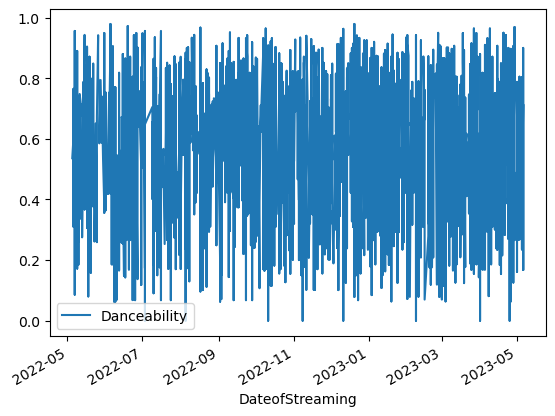

In [82]:
joshstreamingdata.plot.line(x="DateofStreaming", y='Danceability')

In [177]:
samstreamingdata = df[df["Name"] == 'Sam']
samDanceMean = samstreamingdata.groupby('DateofStreaming')['Valence'].mean().reset_index(name='DanceabilityAvg')

In [178]:
samDanceMean

DateofStreaming  DanceabilityAvg
0        2022-05-06         0.598000
1        2022-05-07         0.341600
2        2022-05-10         0.480065
3        2022-05-11         0.362800
4        2022-05-12         0.354033
..              ...              ...
289      2023-04-25         0.510500
290      2023-04-27         0.405906
291      2023-04-28         0.508000
292      2023-04-29         0.326333
293      2023-05-02         0.357736

[294 rows x 2 columns]

<Axes: xlabel='DateofStreaming'>

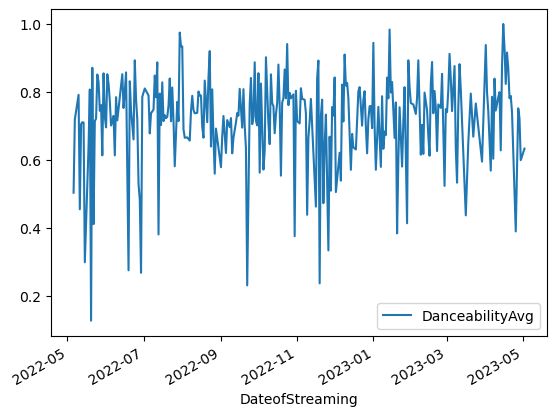

In [132]:

samDanceMean.plot.line(x="DateofStreaming", y='DanceabilityAvg')

In [179]:
samstreamingdata.index = samstreamingdata["DateofStreaming"]
samstreamingdata

Name DateofStreaming           ArtistName  \
DateofStreaming                                             
2022-09-13       Sam      2022-09-13              Rihanna   
2022-10-05       Sam      2022-10-05              Rihanna   
2023-02-27       Sam      2023-02-27        Gracie Abrams   
2022-08-10       Sam      2022-08-10            Tomberlin   
2022-08-10       Sam      2022-08-10            Tomberlin   
...              ...             ...                  ...   
2023-04-27       Sam      2023-04-27   The Mountain Goats   
2023-04-27       Sam      2023-04-27  Akhtar Chanal Zehri   
2023-04-27       Sam      2023-04-27  Akhtar Chanal Zehri   
2023-04-29       Sam      2023-04-29        Gracie Abrams   
2023-05-02       Sam      2023-05-02        Leonard Cohen   

                             SongName  MillisecondsPlayed  Danceability  \
DateofStreaming                                                           
2022-09-13                       Stay                3761         0.621   
2022-10-05                       Stay               10310         0.621   
2023-02-27                       Stay              177153         0.621   
2022-08-10                     Wasted              129393         0.834   
2022-08-10                     Wasted                9705         0.834   
...                               ...                 ...           ...   
2023-04-27                No Children              163269         0.607   
2023-04-27          Daanah Pah Daanah               40611         0.453   
2023-04-27          Daanah Pah Daanah               10374         0.453   
2023-04-29                 Feels Like                2816         0.617   
2023-05-02       Famous Blue Raincoat                 952         0.474   

                 Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
DateofStreaming                                                           
2022-09-13       0.3100    9   -10.164     0       0.0283         0.945   
2022-10-05       0.3100    9   -10.164     0       0.0283         0.945   
2023-02-27       0.3100    9   -10.164     0       0.0283         0.945   
2022-08-10       0.7380    2    -3.652     1       0.1130         0.311   
2022-08-10       0.7380    2    -3.652     1       0.1130         0.311   
...                 ...  ...       ...   ...          ...           ...   
2023-04-27       0.4110    1    -7.566     1       0.0414         0.603   
2023-04-27       0.7140   11   -10.020     1       0.0912         0.541   
2023-04-27       0.7140   11   -10.020     1       0.0912         0.541   
2023-04-29       0.4830   11    -7.359     1       0.0458         0.702   
2023-05-02       0.0404    9   -22.208     0       0.0387         0.948   

                 Instrumentalness  Liveness  Valence    Tempo  
DateofStreaming                                                
2022-09-13               0.000061    0.1170    0.125  111.893  
2022-10-05               0.000061    0.1170    0.125  111.893  
2023-02-27               0.000061    0.1170    0.125  111.893  
2022-08-10               0.000000    0.0900    0.304  131.921  
2022-08-10               0.000000    0.0900    0.304  131.921  
...                           ...       ...      ...      ...  
2023-04-27               0.000671    0.1030    0.412   84.940  
2023-04-27               0.000003    0.0739    0.631  172.545  
2023-04-27               0.000003    0.0739    0.631  172.545  
2023-04-29               0.000216    0.1210    0.176  144.990  
2023-05-02               0.000263    0.1110    0.180  119.415  

[9010 rows x 16 columns]

In [180]:
samDanceMean.index = samDanceMean["DateofStreaming"]
samDanceMean

DateofStreaming  DanceabilityAvg
DateofStreaming                                 
2022-05-06           2022-05-06         0.598000
2022-05-07           2022-05-07         0.341600
2022-05-10           2022-05-10         0.480065
2022-05-11           2022-05-11         0.362800
2022-05-12           2022-05-12         0.354033
...                         ...              ...
2023-04-25           2023-04-25         0.510500
2023-04-27           2023-04-27         0.405906
2023-04-28           2023-04-28         0.508000
2023-04-29           2023-04-29         0.326333
2023-05-02           2023-05-02         0.357736

[294 rows x 2 columns]

In [181]:
samDanceMean["DanceabilityAvg"]

DateofStreaming
2022-05-06    0.598000
2022-05-07    0.341600
2022-05-10    0.480065
2022-05-11    0.362800
2022-05-12    0.354033
                ...   
2023-04-25    0.510500
2023-04-27    0.405906
2023-04-28    0.508000
2023-04-29    0.326333
2023-05-02    0.357736
Name: DanceabilityAvg, Length: 294, dtype: float64

DateofStreaming
2022-05-06    Axes(0.125,0.2;0.775x0.68)
2022-06-05    Axes(0.125,0.2;0.775x0.68)
2022-07-05    Axes(0.125,0.2;0.775x0.68)
2022-08-04    Axes(0.125,0.2;0.775x0.68)
2022-09-03    Axes(0.125,0.2;0.775x0.68)
2022-10-03    Axes(0.125,0.2;0.775x0.68)
2022-11-02    Axes(0.125,0.2;0.775x0.68)
2022-12-02    Axes(0.125,0.2;0.775x0.68)
2023-01-01    Axes(0.125,0.2;0.775x0.68)
2023-01-31    Axes(0.125,0.2;0.775x0.68)
2023-03-02    Axes(0.125,0.2;0.775x0.68)
2023-04-01    Axes(0.125,0.2;0.775x0.68)
2023-05-01    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: DanceabilityAvg, dtype: object

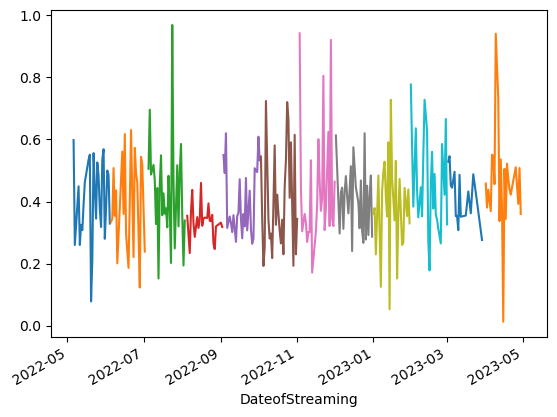

In [176]:
samDanceMean["DanceabilityAvg"].resample('30D').plot.line(x="DateofStreaming", y = "DanceabilityAvg")

In [277]:
def getmedianoffeature(Name , Feature):
    personstreamingdata = df[df["Name"] == Name]
    personFeatureMedian = personstreamingdata.groupby('DateofStreaming')[Feature].median().reset_index(name=Feature + 'Avg')
    personFeatureMedian.index = personFeatureMedian["DateofStreaming"]
    return personFeatureMedian
    

In [278]:
makoFeatureMedian = getmeanoffeature("Mako", "Valence")

In [279]:
makoFeatureMedian

DateofStreaming  ValenceAvg
DateofStreaming                            
2022-04-30           2022-04-30       0.615
2022-05-06           2022-05-06       0.438
2022-05-07           2022-05-07       0.578
2022-05-10           2022-05-10       0.586
2022-05-11           2022-05-11       0.934
...                         ...         ...
2023-04-29           2023-04-29       0.224
2023-04-30           2023-04-30       0.262
2023-05-01           2023-05-01       0.230
2023-05-02           2023-05-02       0.454
2023-05-03           2023-05-03       0.454

[174 rows x 2 columns]

DateofStreaming
2022-04-30    Axes(0.125,0.2;0.775x0.68)
2022-05-30    Axes(0.125,0.2;0.775x0.68)
2022-06-29    Axes(0.125,0.2;0.775x0.68)
2022-07-29    Axes(0.125,0.2;0.775x0.68)
2022-08-28    Axes(0.125,0.2;0.775x0.68)
2022-09-27    Axes(0.125,0.2;0.775x0.68)
2022-10-27    Axes(0.125,0.2;0.775x0.68)
2022-11-26    Axes(0.125,0.2;0.775x0.68)
2022-12-26    Axes(0.125,0.2;0.775x0.68)
2023-01-25    Axes(0.125,0.2;0.775x0.68)
2023-02-24    Axes(0.125,0.2;0.775x0.68)
2023-03-26    Axes(0.125,0.2;0.775x0.68)
2023-04-25    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: ValenceAvg, dtype: object

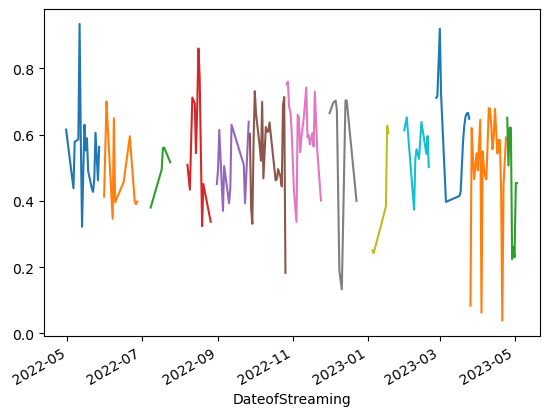

In [280]:
makoFeatureMedian["ValenceAvg"].resample('30D').plot.line(x="DateofStreaming", y = "ValenceAvg")

DateofStreaming
2022-05-06    Axes(0.125,0.2;0.775x0.68)
2022-06-05    Axes(0.125,0.2;0.775x0.68)
2022-07-05    Axes(0.125,0.2;0.775x0.68)
2022-08-04    Axes(0.125,0.2;0.775x0.68)
2022-09-03    Axes(0.125,0.2;0.775x0.68)
2022-10-03    Axes(0.125,0.2;0.775x0.68)
2022-11-02    Axes(0.125,0.2;0.775x0.68)
2022-12-02    Axes(0.125,0.2;0.775x0.68)
2023-01-01    Axes(0.125,0.2;0.775x0.68)
2023-01-31    Axes(0.125,0.2;0.775x0.68)
2023-03-02    Axes(0.125,0.2;0.775x0.68)
2023-04-01    Axes(0.125,0.2;0.775x0.68)
2023-05-01    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: ValenceAvg, dtype: object

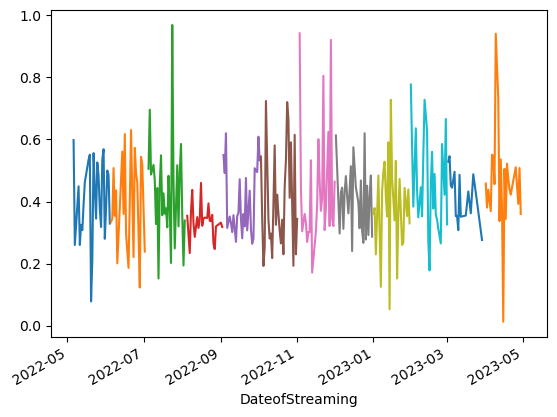

In [282]:
samFeatureMedian = getmedianoffeature("Sam", "Valence")
samFeatureMedian["ValenceAvg"].resample('30D').plot.line(x="DateofStreaming", y = "ValenceAvg")

DateofStreaming
2022-05-05    Axes(0.125,0.2;0.775x0.68)
2022-06-04    Axes(0.125,0.2;0.775x0.68)
2022-07-04    Axes(0.125,0.2;0.775x0.68)
2022-08-03    Axes(0.125,0.2;0.775x0.68)
2022-09-02    Axes(0.125,0.2;0.775x0.68)
2022-10-02    Axes(0.125,0.2;0.775x0.68)
2022-11-01    Axes(0.125,0.2;0.775x0.68)
2022-12-01    Axes(0.125,0.2;0.775x0.68)
2022-12-31    Axes(0.125,0.2;0.775x0.68)
2023-01-30    Axes(0.125,0.2;0.775x0.68)
2023-03-01    Axes(0.125,0.2;0.775x0.68)
2023-03-31    Axes(0.125,0.2;0.775x0.68)
2023-04-30    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: ValenceAvg, dtype: object

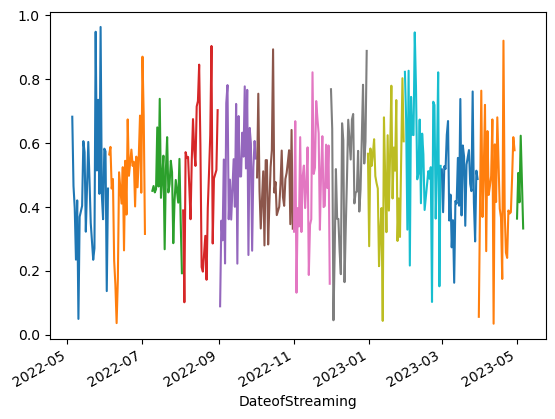

In [284]:
joshFeatureMedian = getmedianoffeature("Josh", "Valence")
joshFeatureMedian["ValenceAvg"].resample('30D').plot.line(x="DateofStreaming", y = "ValenceAvg")

DateofStreaming
2022-05-11    Axes(0.125,0.2;0.775x0.68)
2022-06-10    Axes(0.125,0.2;0.775x0.68)
2022-07-10    Axes(0.125,0.2;0.775x0.68)
2022-08-09    Axes(0.125,0.2;0.775x0.68)
2022-09-08    Axes(0.125,0.2;0.775x0.68)
2022-10-08    Axes(0.125,0.2;0.775x0.68)
2022-11-07    Axes(0.125,0.2;0.775x0.68)
2022-12-07    Axes(0.125,0.2;0.775x0.68)
2023-01-06    Axes(0.125,0.2;0.775x0.68)
2023-02-05    Axes(0.125,0.2;0.775x0.68)
2023-03-07    Axes(0.125,0.2;0.775x0.68)
2023-04-06    Axes(0.125,0.2;0.775x0.68)
2023-05-06    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: ValenceAvg, dtype: object

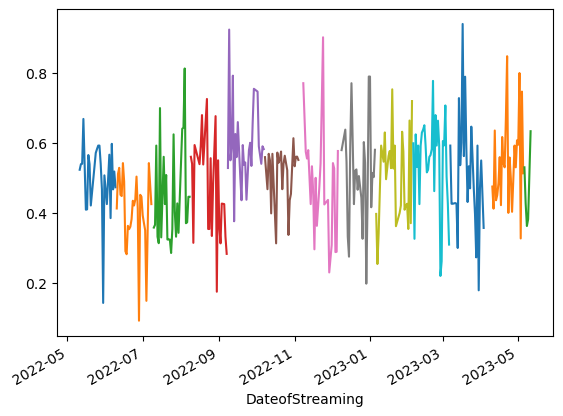

In [285]:
gabrielaFeatureMedian = getmedianoffeature("Gabriela", "Valence")
gabrielaFeatureMedian["ValenceAvg"].resample('30D').plot.line(x="DateofStreaming", y = "ValenceAvg")

DateofStreaming
2022-05-11    Axes(0.125,0.2;0.775x0.68)
2022-06-10    Axes(0.125,0.2;0.775x0.68)
2022-07-10    Axes(0.125,0.2;0.775x0.68)
2022-08-09    Axes(0.125,0.2;0.775x0.68)
2022-09-08    Axes(0.125,0.2;0.775x0.68)
2022-10-08    Axes(0.125,0.2;0.775x0.68)
2022-11-07    Axes(0.125,0.2;0.775x0.68)
2022-12-07    Axes(0.125,0.2;0.775x0.68)
2023-01-06    Axes(0.125,0.2;0.775x0.68)
2023-02-05    Axes(0.125,0.2;0.775x0.68)
2023-03-07    Axes(0.125,0.2;0.775x0.68)
2023-04-06    Axes(0.125,0.2;0.775x0.68)
2023-05-06    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: ValenceAvg, dtype: object

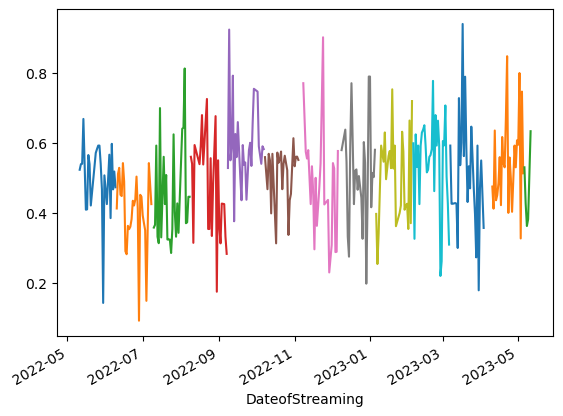

In [286]:
gabrielaFeatureMedian["ValenceAvg"].resample('30D').plot.line(x="DateofStreaming", y = "ValenceAvg")

In [338]:
def getmeanoffeatures(Name , Feature1, Feature2):
    personstreamingdata = df[df["Name"] == Name]
    df1 = personstreamingdata.groupby('DateofStreaming')[Feature1].median().reset_index(name=Feature1 + 'Avg')
    df2 = personstreamingdata.groupby('DateofStreaming')[Feature2].median().reset_index(name=Feature2 + 'Avg')
    df3 = pd.merge(df1, df2, on="DateofStreaming")
    df3.index = df3["DateofStreaming"]
    return df3
    

In [525]:
samFeaturesMean = getmeanoffeatures("Sam", "Valence", "Energy")

In [526]:
samFeaturesMean

DateofStreaming  ValenceAvg  EnergyAvg
DateofStreaming                                       
2022-05-06           2022-05-06      0.5980     0.5030
2022-05-07           2022-05-07      0.2600     0.6940
2022-05-10           2022-05-10      0.4490     0.5930
2022-05-11           2022-05-11      0.2600     0.3720
2022-05-12           2022-05-12      0.3250     0.4480
...                         ...         ...        ...
2023-04-25           2023-04-25      0.5105     0.3525
2023-04-27           2023-04-27      0.3925     0.4670
2023-04-28           2023-04-28      0.5080     0.7220
2023-04-29           2023-04-29      0.3600     0.5820
2023-05-02           2023-05-02      0.3040     0.4140

[294 rows x 3 columns]

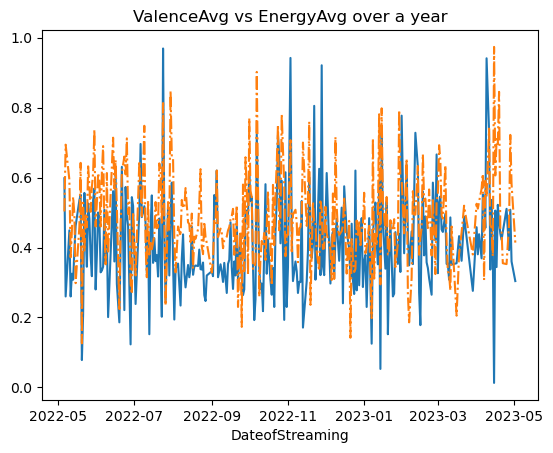

In [527]:
x = samFeaturesMean["DateofStreaming"]
y1 = samFeaturesMean['ValenceAvg']
y2 = samFeaturesMean['EnergyAvg']

plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xlabel("DateofStreaming")
plt.title('ValenceAvg vs EnergyAvg over a year')
plt.show()

In [293]:
makoFeaturesMean = getmeanoffeatures("Mako", "Valence", "Energy")

In [294]:
makoFeaturesMean

DateofStreaming  ValenceAvg  EnergyAvg
DateofStreaming                                       
2022-04-30           2022-04-30       0.615     0.7650
2022-05-06           2022-05-06       0.438     0.5690
2022-05-07           2022-05-07       0.578     0.7050
2022-05-10           2022-05-10       0.586     0.7165
2022-05-11           2022-05-11       0.934     0.8830
...                         ...         ...        ...
2023-04-29           2023-04-29       0.224     0.4280
2023-04-30           2023-04-30       0.262     0.4140
2023-05-01           2023-05-01       0.230     0.4280
2023-05-02           2023-05-02       0.454     0.3530
2023-05-03           2023-05-03       0.454     0.2500

[174 rows x 3 columns]

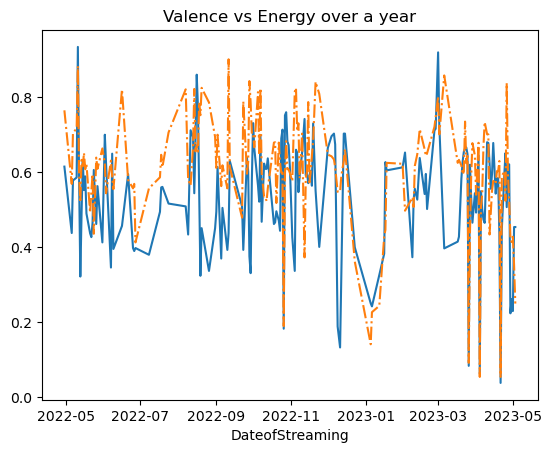

In [295]:
x = makoFeaturesMean["DateofStreaming"]
y1 = makoFeaturesMean['ValenceAvg']
y2 = makoFeaturesMean['EnergyAvg']

plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xlabel("DateofStreaming")
plt.title('Valence vs Energy over a year')
plt.show()

In [296]:
joshFeaturesMean = getmeanoffeatures("Josh", "Valence", "Energy")

In [297]:
joshFeaturesMean

DateofStreaming  ValenceAvg  EnergyAvg
DateofStreaming                                       
2022-05-05           2022-05-05      0.6830     0.6960
2022-05-06           2022-05-06      0.4660     0.3100
2022-05-07           2022-05-07      0.3970     0.6250
2022-05-08           2022-05-08      0.2355     0.5315
2022-05-09           2022-05-09      0.4210     0.6110
...                         ...         ...        ...
2023-05-02           2023-05-02      0.5070     0.6400
2023-05-03           2023-05-03      0.4150     0.6020
2023-05-04           2023-05-04      0.6235     0.6855
2023-05-05           2023-05-05      0.4790     0.8480
2023-05-06           2023-05-06      0.3330     0.3080

[346 rows x 3 columns]

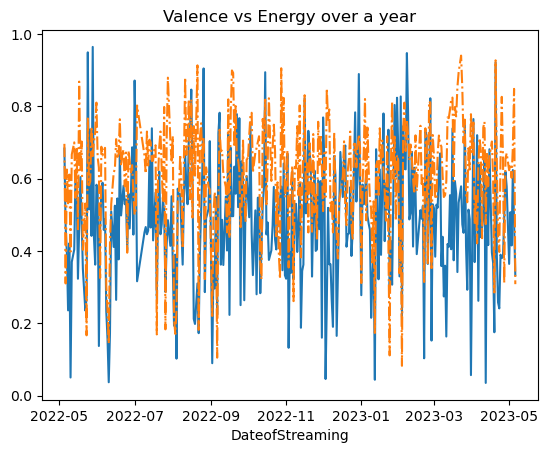

In [298]:
x = joshFeaturesMean["DateofStreaming"]
y1 = joshFeaturesMean['ValenceAvg']
y2 = joshFeaturesMean['EnergyAvg']

plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xlabel("DateofStreaming")
plt.title('Valence vs Energy over a year')
plt.show()

In [508]:
gabrielaFeaturesMean = getmeanoffeatures("Gabriela", "Valence", "Energy")

In [509]:
gabrielaFeaturesMean

DateofStreaming  ValenceAvg  EnergyAvg
DateofStreaming                                       
2022-05-11           2022-05-11      0.5230     0.6470
2022-05-12           2022-05-12      0.5390     0.6320
2022-05-13           2022-05-13      0.5400     0.6770
2022-05-14           2022-05-14      0.6680     0.6450
2022-05-16           2022-05-16      0.4090     0.5940
...                         ...         ...        ...
2023-05-06           2023-05-06      0.5300     0.6220
2023-05-07           2023-05-07      0.4270     0.6245
2023-05-08           2023-05-08      0.3625     0.6765
2023-05-09           2023-05-09      0.3820     0.6445
2023-05-11           2023-05-11      0.6330     0.6810

[311 rows x 3 columns]

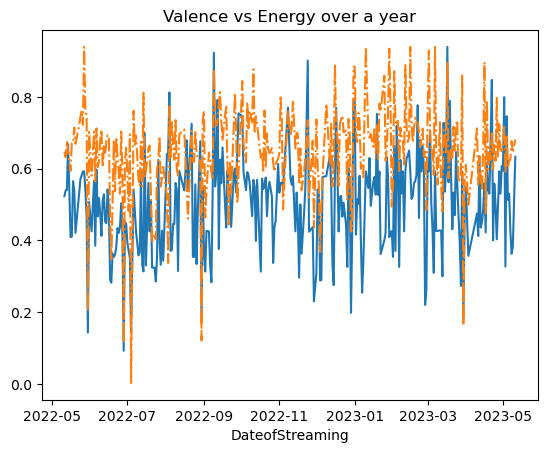

In [510]:
x = gabrielaFeaturesMean["DateofStreaming"]
y1 = gabrielaFeaturesMean['ValenceAvg']
y2 = gabrielaFeaturesMean['EnergyAvg']

plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xlabel("DateofStreaming")
plt.title('Valence vs Energy over a year')
plt.show()

In [302]:
makoFeaturesMean = getmeanoffeatures("Mako", "Valence", "Danceability")
makoFeaturesMean

DateofStreaming  ValenceAvg  DanceabilityAvg
DateofStreaming                                             
2022-04-30           2022-04-30       0.615           0.7190
2022-05-06           2022-05-06       0.438           0.7130
2022-05-07           2022-05-07       0.578           0.7520
2022-05-10           2022-05-10       0.586           0.7495
2022-05-11           2022-05-11       0.934           0.5850
...                         ...         ...              ...
2023-04-29           2023-04-29       0.224           0.4760
2023-04-30           2023-04-30       0.262           0.4670
2023-05-01           2023-05-01       0.230           0.4600
2023-05-02           2023-05-02       0.454           0.6360
2023-05-03           2023-05-03       0.454           0.7810

[174 rows x 3 columns]

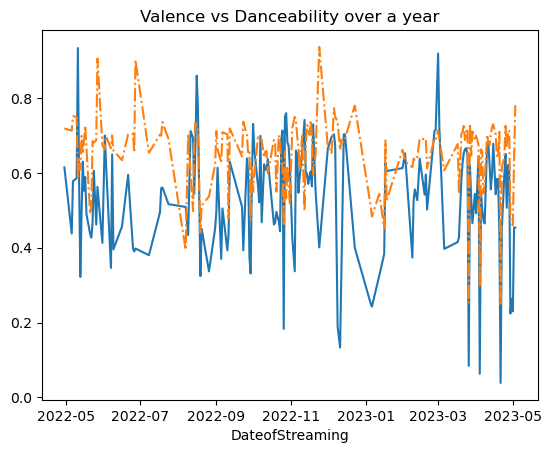

In [303]:
x = makoFeaturesMean["DateofStreaming"]
y1 = makoFeaturesMean['ValenceAvg']
y2 = makoFeaturesMean['DanceabilityAvg']

plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xlabel("DateofStreaming")
plt.title('Valence vs Danceability over a year')
plt.show()

In [529]:
samFeaturesMean = getmeanoffeatures("Sam", "Valence", "Danceability")
samFeaturesMean

DateofStreaming  ValenceAvg  DanceabilityAvg
DateofStreaming                                             
2022-05-06           2022-05-06      0.5980            0.643
2022-05-07           2022-05-07      0.2600            0.230
2022-05-10           2022-05-10      0.4490            0.610
2022-05-11           2022-05-11      0.2600            0.493
2022-05-12           2022-05-12      0.3250            0.515
...                         ...         ...              ...
2023-04-25           2023-04-25      0.5105            0.702
2023-04-27           2023-04-27      0.3925            0.581
2023-04-28           2023-04-28      0.5080            0.807
2023-04-29           2023-04-29      0.3600            0.617
2023-05-02           2023-05-02      0.3040            0.512

[294 rows x 3 columns]

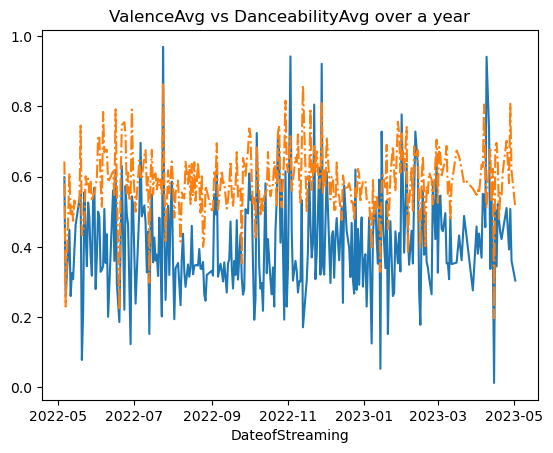

In [530]:
x = samFeaturesMean["DateofStreaming"]
y1 = samFeaturesMean['ValenceAvg']
y2 = samFeaturesMean['DanceabilityAvg']


plt.plot(x, y1, label="Valence")
plt.plot(x, y2, '-.', label="Danceability")
plt.xlabel("DateofStreaming")
plt.title('ValenceAvg vs DanceabilityAvg over a year')

plt.show()

In [339]:
joshFeaturesMean = getmeanoffeatures("Josh", "Energy", "Danceability")
joshFeaturesMean

DateofStreaming  EnergyAvg  DanceabilityAvg
DateofStreaming                                            
2022-05-05           2022-05-05     0.6960           0.5360
2022-05-06           2022-05-06     0.3100           0.6050
2022-05-07           2022-05-07     0.6250           0.5960
2022-05-08           2022-05-08     0.5315           0.5360
2022-05-09           2022-05-09     0.6110           0.6320
...                         ...        ...              ...
2023-05-02           2023-05-02     0.6400           0.6550
2023-05-03           2023-05-03     0.6020           0.5790
2023-05-04           2023-05-04     0.6855           0.5135
2023-05-05           2023-05-05     0.8480           0.5300
2023-05-06           2023-05-06     0.3080           0.5480

[346 rows x 3 columns]

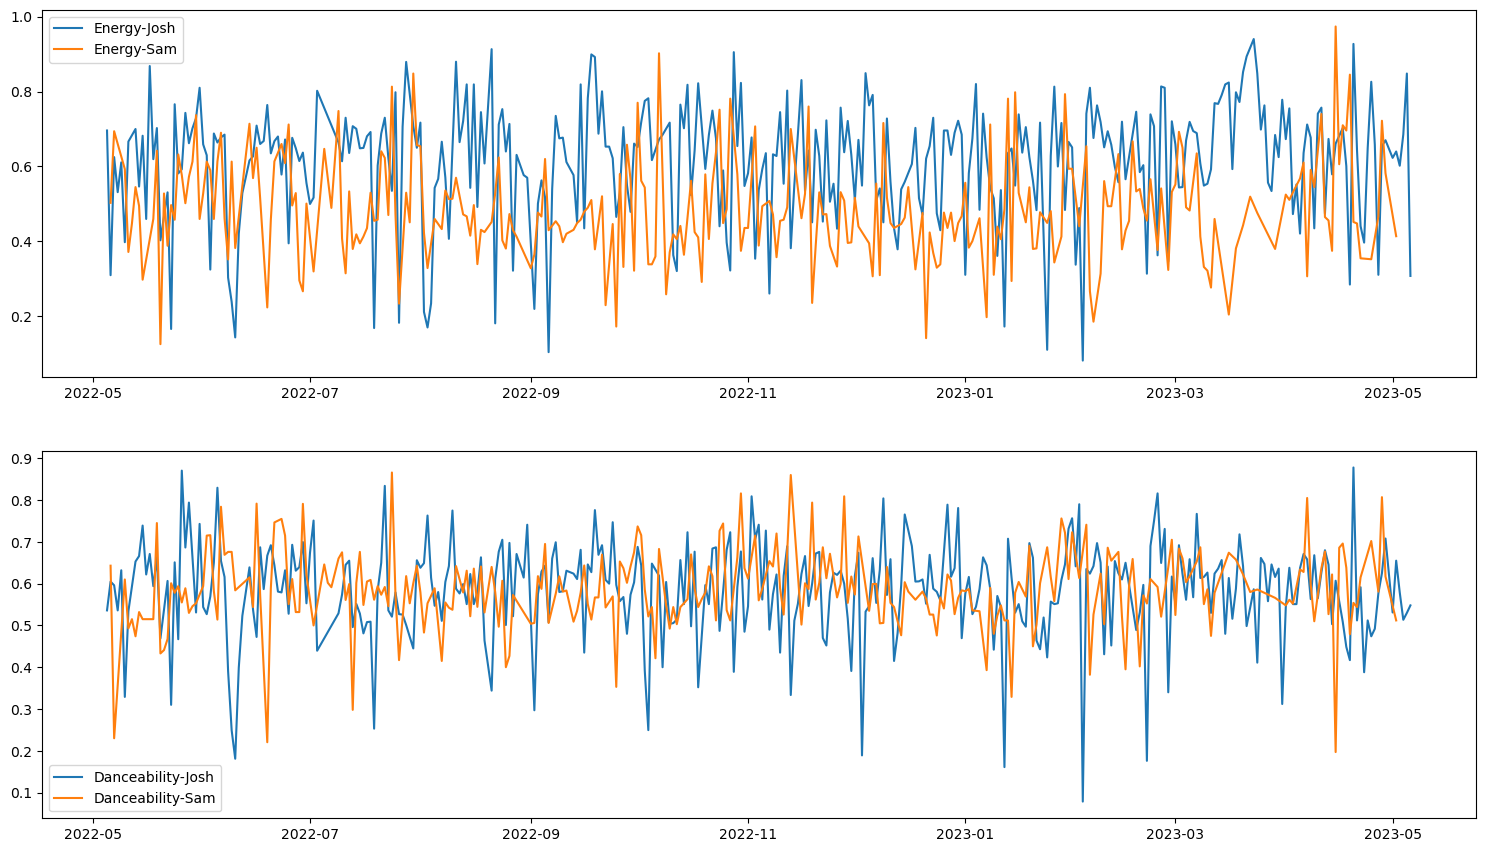

In [341]:
x = joshFeaturesMean["DateofStreaming"]
y1 = joshFeaturesMean['EnergyAvg']
y2 = joshFeaturesMean['DanceabilityAvg']

x2 = samFeaturesMean["DateofStreaming"]
y21 = samFeaturesMean['EnergyAvg']
y22 = samFeaturesMean['DanceabilityAvg']


fig,a =  plt.subplots(2,1)
fig.set_size_inches(18.5, 10.5)
a[0].plot(x, y1, label="Energy-Josh")
a[0].plot(x2, y21, label="Energy-Sam")
a[0].legend()
a[1].plot(x, y2, label="Danceability-Josh")
a[1].plot(x2, y22, label="Danceability-Sam")
a[1].legend()
# plt.plot(x, y1)
# plt.plot(x, y2, '-.')
# plt.xlabel("DateofStreaming")
# plt.title('Valence vs Danceability over a year')
# plt.show()


In [308]:
gabrielaFeaturesMean = getmeanoffeatures("Gabriela", "Valence", "Danceability")
gabrielaFeaturesMean

DateofStreaming  ValenceAvg  DanceabilityAvg
DateofStreaming                                             
2022-05-11           2022-05-11      0.5230           0.6470
2022-05-12           2022-05-12      0.5390           0.7290
2022-05-13           2022-05-13      0.5400           0.7580
2022-05-14           2022-05-14      0.6680           0.8610
2022-05-16           2022-05-16      0.4090           0.6860
...                         ...         ...              ...
2023-05-06           2023-05-06      0.5300           0.6850
2023-05-07           2023-05-07      0.4270           0.6785
2023-05-08           2023-05-08      0.3625           0.6685
2023-05-09           2023-05-09      0.3820           0.6160
2023-05-11           2023-05-11      0.6330           0.6950

[311 rows x 3 columns]

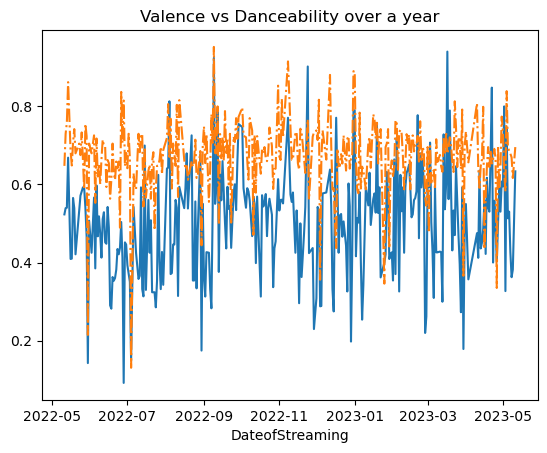

In [309]:
x = gabrielaFeaturesMean["DateofStreaming"]
y1 = gabrielaFeaturesMean['ValenceAvg']
y2 = gabrielaFeaturesMean['DanceabilityAvg']

plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xlabel("DateofStreaming")
plt.title('Valence vs Danceability over a year')
plt.show()

DateofStreaming
2022-05-06    Axes(0.125,0.2;0.775x0.68)
2022-06-05    Axes(0.125,0.2;0.775x0.68)
2022-07-05    Axes(0.125,0.2;0.775x0.68)
2022-08-04    Axes(0.125,0.2;0.775x0.68)
2022-09-03    Axes(0.125,0.2;0.775x0.68)
2022-10-03    Axes(0.125,0.2;0.775x0.68)
2022-11-02    Axes(0.125,0.2;0.775x0.68)
2022-12-02    Axes(0.125,0.2;0.775x0.68)
2023-01-01    Axes(0.125,0.2;0.775x0.68)
2023-01-31    Axes(0.125,0.2;0.775x0.68)
2023-03-02    Axes(0.125,0.2;0.775x0.68)
2023-04-01    Axes(0.125,0.2;0.775x0.68)
2023-05-01    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: TempoAvg, dtype: object

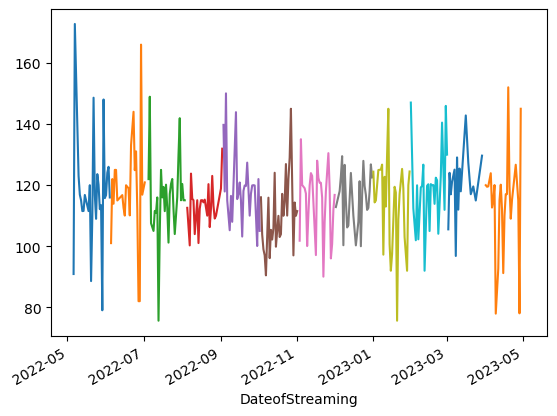

In [310]:
samFeatureMedian = getmedianoffeature("Sam", "Tempo")
samFeatureMedian["TempoAvg"].resample('30D').plot.line(x="DateofStreaming", y = "TempoAvg")

DateofStreaming
2022-04-30    Axes(0.125,0.2;0.775x0.68)
2022-05-30    Axes(0.125,0.2;0.775x0.68)
2022-06-29    Axes(0.125,0.2;0.775x0.68)
2022-07-29    Axes(0.125,0.2;0.775x0.68)
2022-08-28    Axes(0.125,0.2;0.775x0.68)
2022-09-27    Axes(0.125,0.2;0.775x0.68)
2022-10-27    Axes(0.125,0.2;0.775x0.68)
2022-11-26    Axes(0.125,0.2;0.775x0.68)
2022-12-26    Axes(0.125,0.2;0.775x0.68)
2023-01-25    Axes(0.125,0.2;0.775x0.68)
2023-02-24    Axes(0.125,0.2;0.775x0.68)
2023-03-26    Axes(0.125,0.2;0.775x0.68)
2023-04-25    Axes(0.125,0.2;0.775x0.68)
Freq: 30D, Name: TempoAvg, dtype: object

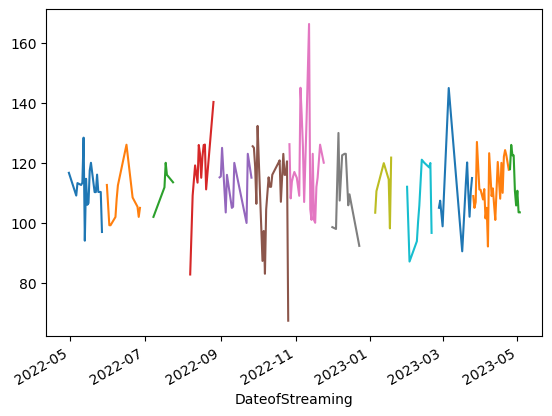

In [311]:
makoFeatureMedian = getmedianoffeature("Mako", "Tempo")
makoFeatureMedian["TempoAvg"].resample('30D').plot.line(x="DateofStreaming", y = "TempoAvg")

In [342]:
# VINAYAK

In [450]:
def foo(Name , Feature1, Feature2):
    personstreamingdata = df[df["Name"] == Name]
    df1 = personstreamingdata.groupby('DateofStreaming')[Feature1].min().reset_index(name=Feature1)
    df2 = personstreamingdata.groupby('DateofStreaming')[Feature2].min().reset_index(name=Feature2)
    df3 = pd.merge(df1, df2, on="DateofStreaming")
    df3.index = df3["DateofStreaming"]
    return df3

In [453]:
ulist = ["Gabriela", "Josh", "Mako", "Sam"]
dflist = []
features = ["Energy", "Valence"]
for u in ulist:
    dflist.append(foo(u, "Energy", "Valence"))

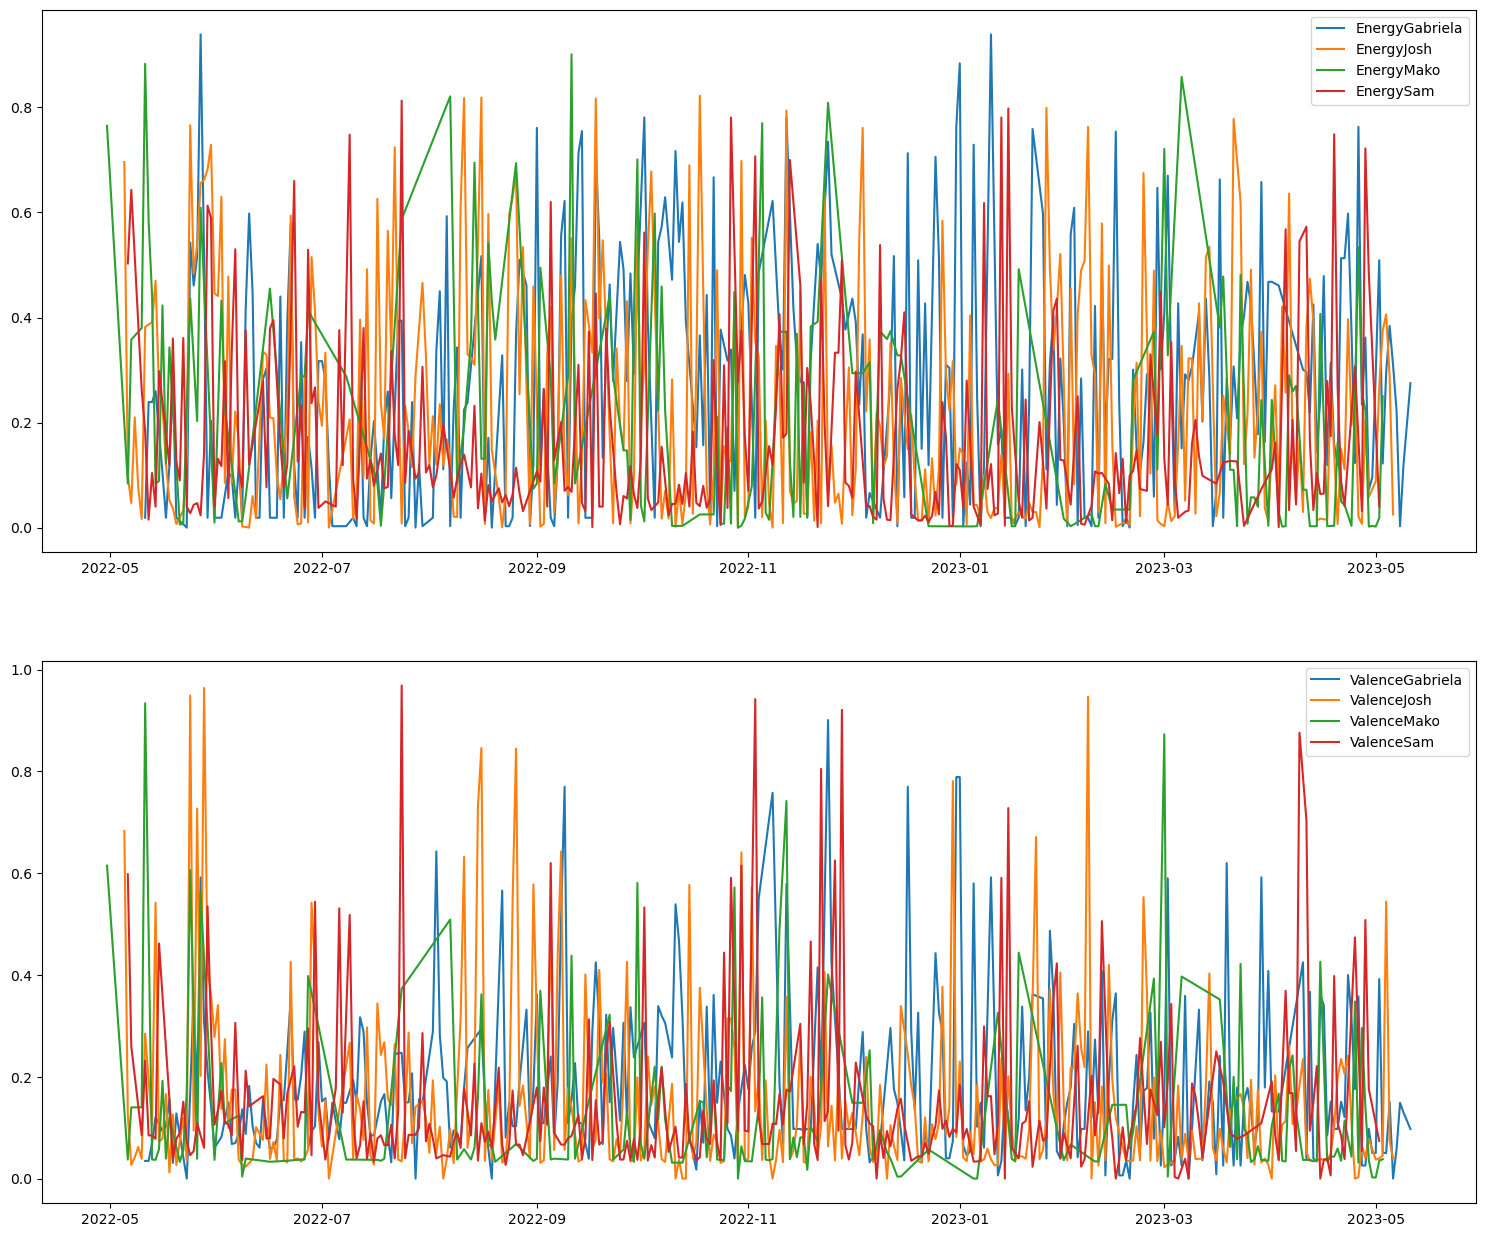

In [454]:
fig, a = plt.subplots(len(features), 1)
fig.set_size_inches(18.5, 15.5)
f = 0
for i in range(0, len(features)):
    for j in range(0, len(ulist)):
        x = dflist[j]["DateofStreaming"]
        y = dflist[j][features[f]]
        a[i].plot(x, y, label = features[f]+ulist[j])
        a[i].legend()
    f = 1
plt.show()

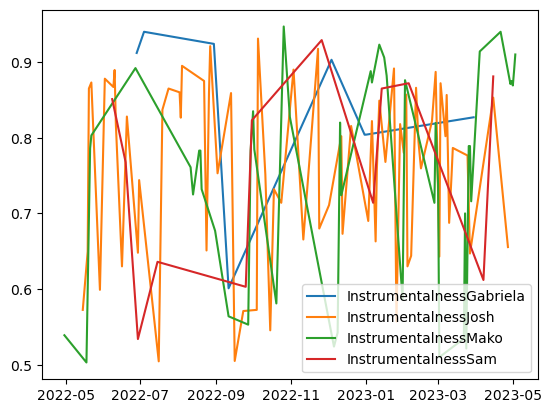

In [397]:

for j in range(0, len(ulist)):
    udf = dflist[j]
    df_filtered = udf[udf["Instrumentalness"] >= 0.5]
    x = df_filtered["DateofStreaming"]
    y = df_filtered["Instrumentalness"]
    plt.plot(x, y, label = "Instrumentalness"+ulist[j])
    plt.legend()
plt.show()

In [387]:
dflist[0]

DateofStreaming  Instrumentalness  Loudness
DateofStreaming                                            
2022-05-11           2022-05-11          0.004020   -6.8680
2022-05-12           2022-05-12          0.007230   -6.9220
2022-05-13           2022-05-13          0.000592   -6.3495
2022-05-14           2022-05-14          0.000592   -6.9600
2022-05-16           2022-05-16          0.000112   -7.5440
...                         ...               ...       ...
2023-05-06           2023-05-06          0.000008   -5.4230
2023-05-07           2023-05-07          0.000019   -6.5185
2023-05-08           2023-05-08          0.000702   -5.7470
2023-05-09           2023-05-09          0.000000   -5.3280
2023-05-11           2023-05-11          0.000080   -4.3250

[311 rows x 3 columns]

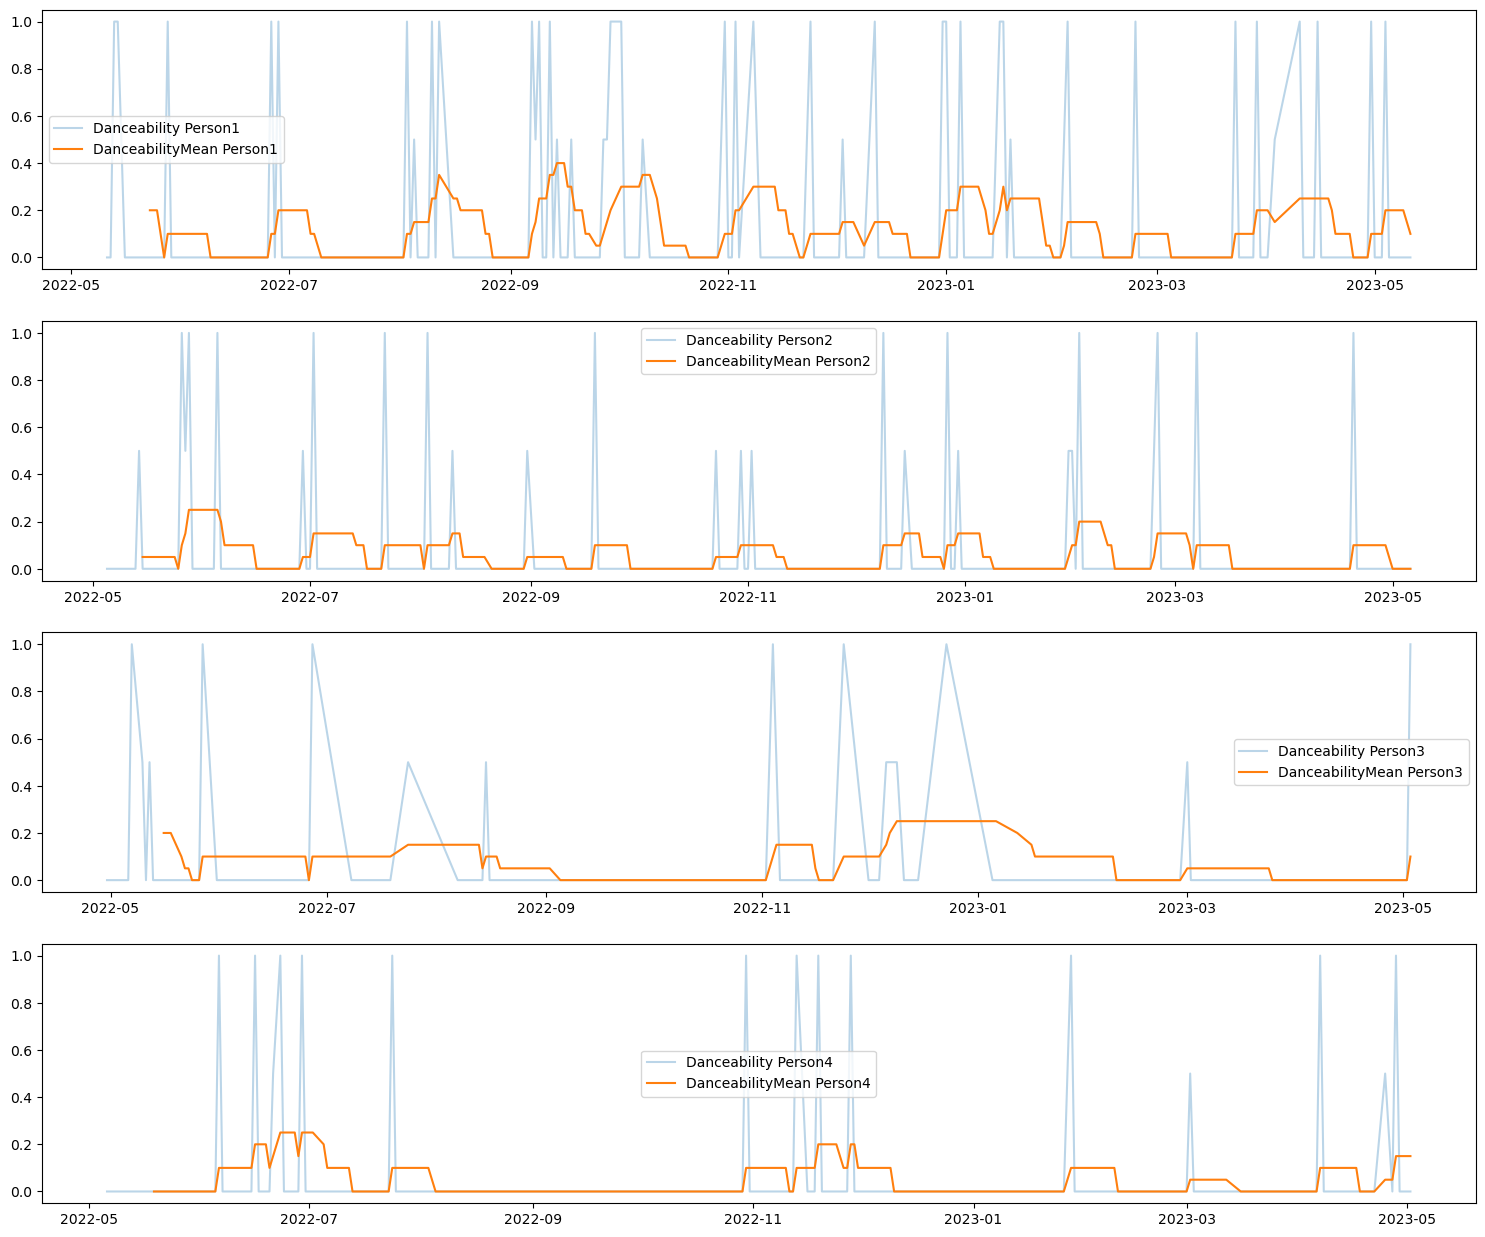

In [534]:
def isHighConfidence(row, feature):
    if row[feature] >= 0.75 :
        return 1
    else:
        return 0

    
def createFeatureConfidence(name, feature):
    personstreamingdata = df[df["Name"] == name]
    personstreamingdata[feature+"Conclusion"] = personstreamingdata.apply(lambda row: isHighConfidence(row, feature), axis=1)
    return personstreamingdata

ulist = ["Gabriela", "Josh", "Mako", "Sam"]
dflist = []
feature = "Danceability"
for u in ulist:
    dflist.append(createFeatureConfidence(u, feature))

    
def createStatData(dfgoo, name , feature):
    personstreamingdata = dfgoo[dfgoo["Name"] == name]
    df1 = personstreamingdata.groupby('DateofStreaming')[feature+"Conclusion"].median().reset_index(name=feature+"Conclusion")
    df1.index = df1["DateofStreaming"]
    return df1

fig, a = plt.subplots(len(ulist), 1)
fig.set_size_inches(18.5, 15.5)
for j in range(0, len(ulist)):
    udf = createStatData(dflist[j], ulist[j], feature)
    udf['rm'] = udf[feature+"Conclusion"].rolling(10).mean()
    x = udf["DateofStreaming"]
    y = udf[feature+"Conclusion"]
    y_mean = udf["rm"]
    a[j].plot(x, y, label = feature + " Person" + str(1+j), alpha =0.3)
    a[j].plot(x, y_mean, label = feature + "Mean Person"+str(1+j))
    a[j].legend()
plt.show()

In [479]:
df

Name DateofStreaming            ArtistName  \
0          Josh      2022-05-05           The Zombies   
1          Josh      2022-10-07           The Zombies   
2          Josh      2022-12-19           The Zombies   
3          Josh      2022-05-06                  Love   
4          Josh      2022-11-01                  Love   
...         ...             ...                   ...   
31951  Gabriela      2023-05-09  Leyendas Legendarias   
31952  Gabriela      2023-05-09  Leyendas Legendarias   
31953  Gabriela      2023-05-09  Leyendas Legendarias   
31954  Gabriela      2023-05-09  Leyendas Legendarias   
31955  Gabriela      2023-05-09          Taylor Swift   

                                     SongName  MillisecondsPlayed  \
0           Time of the Season - Mono Version               40740   
1           Time of the Season - Mono Version              214026   
2           Time of the Season - Mono Version              214026   
3                      Everybody’s Gotta Live              204521   
4                      Everybody’s Gotta Live              204521   
...                                       ...                 ...   
31951                  E218: Madeleine McCann                 559   
31952                  E218: Madeleine McCann                1301   
31953                  E218: Madeleine McCann                 597   
31954                  E218: Madeleine McCann             3195917   
31955  Miss Americana & The Heartbreak Prince              164834   

       Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0             0.536   0.696    4    -6.818     0       0.0365         0.134   
1             0.536   0.696    4    -6.818     0       0.0365         0.134   
2             0.536   0.696    4    -6.818     0       0.0365         0.134   
3             0.605   0.281    9   -11.877     0       0.1290         0.607   
4             0.605   0.281    9   -11.877     0       0.1290         0.607   
...             ...     ...  ...       ...   ...          ...           ...   
31951         0.507   0.659    1    -4.068     0       0.0294         0.106   
31952         0.507   0.659    1    -4.068     0       0.0294         0.106   
31953         0.507   0.659    1    -4.068     0       0.0294         0.106   
31954         0.507   0.659    1    -4.068     0       0.0294         0.106   
31955         0.310   0.120    9   -24.310     1       0.0403         0.992   

       Instrumentalness  Liveness  Valence    Tempo  
0              0.000003     0.287    0.683  117.179  
1              0.000003     0.287    0.683  117.179  
2              0.000003     0.287    0.683  117.179  
3              0.000000     0.116    0.280  103.877  
4              0.000000     0.116    0.280  103.877  
...                 ...       ...      ...      ...  
31951          0.000000     0.197    0.382   79.032  
31952          0.000000     0.197    0.382   79.032  
31953          0.000000     0.197    0.382   79.032  
31954          0.000000     0.197    0.382   79.032  
31955          0.902000     0.104    0.130   88.066  

[31956 rows x 16 columns]